In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture


data = np.load( "formationchannels.npy" )

(3,)
(3, 1)
(3, 1, 1)


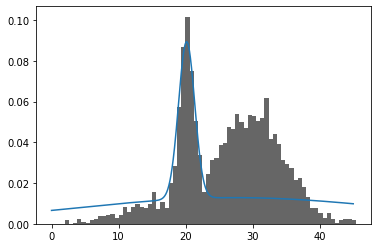

In [40]:
fig , ax = plt.subplots()

counts, bins, _ = ax.hist(data, bins=70, density=True, color='black', alpha=0.6)


means_guesstimate = np.array([15,20,30])
means_guesstimate = means_guesstimate[:,np.newaxis]

GM = GaussianMixture(n_components=3, means_init=means_guesstimate).fit(data)

w = GM.weights_
m = GM.means_
C = GM.covariances_

print(w.shape)
print(m.shape)
print(C.shape)

W = []
M = []
S = []

for i in range(3):
    W.append( w[i] )
    M.append( m[i][0])
    S.append( C[i][0][0] )

x  = np.linspace(0,45,10000)
f  = W[0] * norm.pdf(x, loc=M[0], scale=S[0]) 
f += W[1] * norm.pdf(x, loc=M[1], scale=S[1]) 
f += W[2] * norm.pdf(x, loc=M[2], scale=S[2])

ax.plot( x, f)

plt.show()

# 3 gaussians?

(3,)
(3, 1)
(3, 1, 1)
